# 5. Слияние данных

### Библиотеки / данные

импортируем библиотеки numpy и pandas

In [3]:
import numpy as np
import pandas as pd

задаем некоторые настройки pandas, регулирующие формат вывода

In [4]:
pd.options.display.max_rows = 10

In [5]:
import datetime
def convert_dotnet_tick(ticks):
    """Convert .NET ticks to formatted ISO8601 time
    Args:
        ticks: integer
            i.e 100 nanosecond increments since 1/1/1 AD"""
    _date = datetime.datetime(1, 1, 1) + \
        datetime.timedelta(microseconds=ticks // 10)
    if _date.year < 1900:  # strftime() requires year >= 1900
        _date = _date.replace(year=_date.year + 1900)
    return _date.strftime("%Y-%m-%d %H:%M:%S.%S")[:-3]

In [6]:
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd

'''
Перевести время в DateTime, секунды или др.
1a) Используя GroupBy сгруп по mac.
1б) Используя GroupBy сгруп по mac без последней цифры.
2) Посчитать "Среднее взвешенное местоположение" точки.
3) Отобразить полученные точки на картинке.
'''


floor = 3
dfs = []
for (dirpath, dirnames, filenames) in os.walk("./csv"):
    for file in filenames:
        path = os.path.join(dirpath, file)
        if (file.endswith(".csv")):
            dfs.append(pd.read_csv(path, delimiter=",", header=None))
df = pd.concat(dfs, ignore_index=True)
line = "Время,X,Y,Этаж,SSID,BSID(мак-адрес),сигнал(dB),частота,?,?,ш,д,выс,точн".split(",")
markup = {i: line[i] for i in range(14)}
df = df.rename(columns=markup)
df["Время"] = df["Время"].apply(lambda ts: pd.to_datetime(convert_dotnet_tick(ts)))
df = df[df["SSID"] == "UTMN"]
df

,Время,X,Y,Этаж,SSID,BSID(мак-адрес),сигнал(dB),частота,?,?,ш,д,выс,точн
1,2022-05-13 10:53:25,1996.151,478.0,4,UTMN,dc:f7:19:0d:73:cf,-64,5745,NaN,NaN,65.522274,57.159050,77.000000,14.619
6,2022-05-13 10:53:25,1996.151,478.0,4,UTMN,f0:1d:2d:ed:1a:40,-65,2437,NaN,NaN,65.522274,57.159050,77.000000,14.619
12,2022-05-13 10:53:25,1996.151,478.0,4,UTMN,dc:f7:19:0d:73:c0,-71,2412,NaN,NaN,65.522274,57.159050,77.000000,14.619
13,2022-05-13 10:53:25,1996.151,478.0,4,UTMN,f0:1d:2d:ec:c6:c0,-84,2462,NaN,NaN,65.522274,57.159050,77.000000,14.619
16,2022-05-13 10:53:25,1996.151,478.0,4,UTMN,f0:1d:2d:ec:c6:cf,-88,5805,NaN,NaN,65.522274,57.159050,77.000000,14.619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,2022-05-17 11:15:13,173.000,352.0,2,UTMN,dc:f7:19:0d:73:6f,-79,5220,NaN,NaN,65.522995,57.158714,68.900002,15.133
3456,2022-05-17 11:15:13,173.000,352.0,2,UTMN,f0:1d:2d:ec:dc:af,-86,5220,NaN,NaN,65.522995,57.158714,68.900002,15.133
3458,2022-05-17 11:15:13,173.000,352.0,2,UTMN,7e:83:c2:24:f7:f1,-85,2462,NaN,NaN,65.522995,57.158714,68.900002,15.133
3459,2022-05-17 11:15:13,173.000,352.0,2,UTMN,7e:83:c2:24:f5:28,-85,2437,NaN,NaN,65.522995,57.158714,68.900002,15.133


### 1A

In [7]:
mac_group1 = df.groupby(by="BSID(мак-адрес)")

### 1B

In [8]:
pre_group = df
pre_group["BSID(мак-адрес)"] = pre_group["BSID(мак-адрес)"].apply(lambda x: x[:-1])
mac_group2 = pre_group.groupby(by="BSID(мак-адрес)")

### 2

In [11]:
from PIL import Image

In [24]:
floor = 2
img = Image.open(f"./img/{floor}.jpg")
img_resized = img.resize(tuple(map(lambda x: x*10, img.size)))

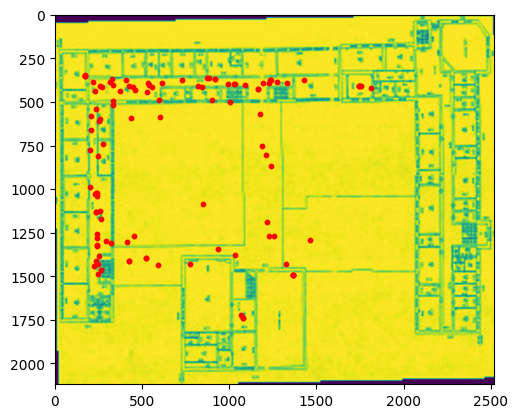

In [25]:
result1 = mac_group1.apply(lambda x: pd.Series(np.average(x[["X", "Y"]], weights= -1 / x["сигнал(dB)"], axis=0), ["X", "Y"]))
plt.scatter(x=list(result1["X"]), y=list(result1["Y"]), c="r", s=10)
implot = plt.imshow(img_resized)
plt.show()

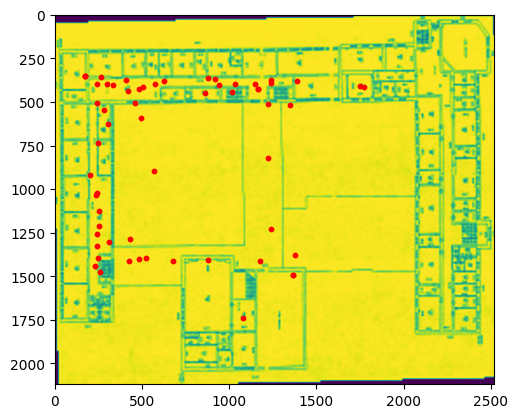

In [26]:
result2 = mac_group2.apply(lambda x: pd.Series(np.average(x[["X", "Y"]], weights= -1 / x["сигнал(dB)"], axis=0), ["X", "Y"]))
plt.scatter(x=list(result2["X"]), y=list(result2["Y"]), c="r", s=10)
implot = plt.imshow(img_resized)
plt.show()